In [11]:
import tensorflow as tf
import numpy as np
from keras.layers import Dense, GlobalAveragePooling2D
from keras.models import Model
from keras.applications.vgg16 import VGG16

# Generación del Modelo

In [12]:
# Cargar modelo VGG16 pre-entrenado
base_model = VGG16(weights='imagenet', include_top=False)


58900480/58889256 [==============================] - 5s 0us/step


In [20]:
# Utilizar la salida de la última capa convolutional como características
x = base_model.output
x = GlobalAveragePooling2D()(x)

In [21]:
# Añadir una capa densa para la clasificación
x = Dense(1024, activation='relu')(x)
predictions = Dense(10, activation='softmax')(x)

In [22]:
# Crear el modelo personalizado
model = Model(inputs=base_model.input, outputs=predictions)

In [23]:
# Congelar las capas del modelo pre-entrenado
for layer in base_model.layers:
    layer.trainable = False

In [24]:
# Compilar el modelo
model.compile(optimizer='rmsprop', loss='categorical_crossentropy')

# Carga Imagen Prueba

In [190]:
import numpy as np
from keras.preprocessing import image
import matplotlib.pyplot as plt
import cv2
from scipy.interpolate import interp2d
from PIL import Image
#!pip install opencv-python

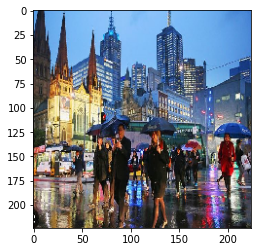

In [271]:
path_img = './data/ciudad.jpg'
# Cargar la imagen de prueba
img = image.load_img(path_img, target_size=(224, 224))

plt.imshow(img)

In [272]:
# Convertir la imagen a un array numpy
array_img = image.img_to_array(img)
# Añadir una dimensión adicional para que tenga el formato esperado por el modelo (batch_size, height, width, channels)
x = np.expand_dims(array_img, axis=0)
np.shape(x)

(1, 224, 224, 3)

# Predicción Características

In [273]:
# Hacer predicciones
features_ = base_model.predict(x)[0]
print(features_.shape)

(7, 7, 512)


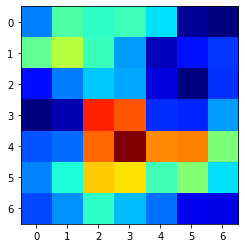

In [274]:
# Promediar los canales de las características
features = np.mean(features_, axis=-1)
# Mostrar la imagen resultante
plt.imshow(features, cmap='jet')
plt.show()

In [275]:
print(array_img.shape)

(224, 224, 3)


## Interpolación de Features

In [276]:
# Crear una función de interpolación
interp_func = interp2d(np.arange(features.shape[1]), np.arange(features.shape[0]), features, kind='cubic')

In [277]:
# Calcular los nuevos valores del array redimensionado
new_cols, new_rows = array_img.shape[1], array_img.shape[0]
new_features = interp_func(np.linspace(0, features.shape[1]-1, new_cols), np.linspace(0, features.shape[0]-1, new_rows))

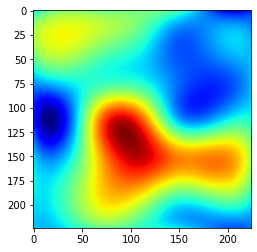

In [278]:
# Mostrar la imagen resultante
plt.imshow(new_features, cmap='jet')
plt.show()

## Representación Características

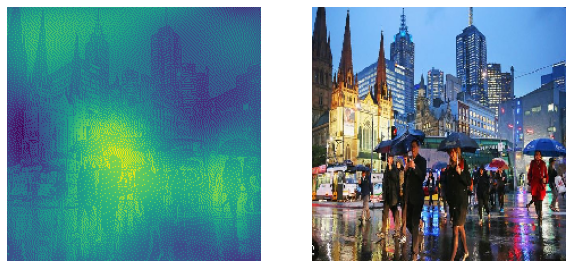

In [279]:
# Transformar imagen a escala de grises
img_gray = img.convert('1')
superimposed_img = new_features

# Crear una figura con dos ejes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))

# Mostrar la primera imagen en el primer eje
ax1.imshow(superimposed_img * 0.5 + img_gray )
ax1.axis("off")

# Mostrar la segunda imagen en el segundo eje
ax2.imshow(img)
ax2.axis("off")

# Mostrar la figura
plt.show()